In [ ]:
#Import Python Packages
#from google.colab import drive
#drive.mount('/content/drive/')

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#Import all necessary librabry

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [ ]:
#Read training data file
trainData = pd.read_csv('/gdrive/My Drive/Santander Customer Satisfaction - TRAIN-2.csv')

#Read test data file
testData = pd.read_csv('/gdrive/My Drive/Santander Customer Satisfaction - TEST-Without TARGET-2.csv')


In [ ]:
trainData.info()
print()
testData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [ ]:
trainData.head()
#print("=======")


In [ ]:
testData.head()

In [ ]:
print(trainData.shape)      # To get (Number of Rows, Number of Columns) of a data frame we use DataFrame.shape
print(testData.shape)

(76020, 371)
(75818, 370)


In [ ]:
#Understanding the Columns

trainData.info()
print()
testData.info()

In [ ]:
# To check number of null values; we see zero nulls in our attributes
trainData.isna().sum()

In [ ]:
# To check basic statistics of a data set, column wise
trainData.describe()

In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData.columns.values)
TestCols = list(testData.columns.values)
print(TrainCols)
print(TestCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

In [ ]:
# Seperate Target column from Train Data
Xtrain = trainData[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData[['TARGET']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = testData.copy()

(76020, 370)
(76020, 1)


In [ ]:
# Initialising Decision Tree Algorithm and fitting the model on train set
dt = DecisionTreeClassifier()
dt.fit(Xtrain, Ytrain)

Y_Pred = dt.predict(Xtest)


In [ ]:
# Basic Analysis
print("Count of 0 & 1 in TARGET column for Train Data")
print(Ytrain['TARGET'].value_counts())


Count of 0 & 1 in TARGET column for Train Data
0    73012
1     3008
Name: TARGET, dtype: int64


In [ ]:
# For us to check accuracy of our algorithm, we need to predict that data set for which we have TARGET available.
# Eg predict for Xtrain and check accuracy with TARGET that we have in order to judge our model.

X_Pred = dt.predict(Xtrain)
#Model Accuracy
print("Accuracy:", metrics.accuracy_score(Ytrain,X_Pred)) # here we check the predictions of x train with the target column of x (y train)

# This will always result in best score hence we are better of using TrainTestSplit, which can help us take care of

Accuracy: 1.0


In [ ]:
# Split dataset - 80:20 split for train and test
# RANDOM STATE IS SHUFFELING DATA
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = .20, random_state = 1)


# Fit model on new Train Dataset
dt = dt.fit(X_train, Y_train)


#Predict the responce on new Test Dataset
Y_PredNew = dt.predict(X_test)
Y_new = dt.predict(X_train)

#Model Accuracy
print("Training Accuracy:", metrics.accuracy_score(Y_train, Y_new))
print("Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew))

Training Accuracy: 1.0
Accuracy: 0.9294264667192844


In [ ]:
for i in [5 , 10, 15, 20, 25, 30, 35]:
  x_Train, x_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size = i*0.01, random_state = 0)
  print("Accuracy for test split:", i , metrics.accuracy_score(Y_test, Y_PredNew))
# we see that accuracy

Accuracy for test split: 5 0.9294264667192844
Accuracy for test split: 10 0.9294264667192844
Accuracy for test split: 15 0.9294264667192844
Accuracy for test split: 20 0.9294264667192844
Accuracy for test split: 25 0.9294264667192844
Accuracy for test split: 30 0.9294264667192844
Accuracy for test split: 35 0.9294264667192844


In [ ]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(metrics.confusion_matrix(Y_test, Y_PredNew))
print()
print('Printing the precision and recall, among other metrics')

print(metrics.classification_report(Y_test, Y_PredNew))

[[14035   566]
 [  507    96]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     14601
           1       0.15      0.16      0.15       603

    accuracy                           0.93     15204
   macro avg       0.56      0.56      0.56     15204
weighted avg       0.93      0.93      0.93     15204



[Text(0.4868243243243243, 0.95, 'X[183] <= 2.445\ngini = 0.076\nsamples = 60816\nvalue = [58411, 2405]'),
 Text(0.2722972972972973, 0.85, 'X[2] <= 27.5\ngini = 0.162\nsamples = 17008\nvalue = [15496, 1512]'),
 Text(0.12010135135135135, 0.75, 'X[369] <= 57022.035\ngini = 0.048\nsamples = 8899\nvalue = [8680, 219]'),
 Text(0.062162162162162166, 0.65, 'X[28] <= 0.5\ngini = 0.11\nsamples = 1146\nvalue = [1079, 67]'),
 Text(0.051351351351351354, 0.55, 'X[5] <= 1323.495\ngini = 0.106\nsamples = 1139\nvalue = [1075, 64]'),
 Text(0.04594594594594595, 0.45, 'X[369] <= 56961.629\ngini = 0.105\nsamples = 1138\nvalue = [1075, 63]'),
 Text(0.04054054054054054, 0.35, 'X[2] <= 23.5\ngini = 0.103\nsamples = 1137\nvalue = [1075, 62]'),
 Text(0.021621621621621623, 0.25, 'X[278] <= 1.5\ngini = 0.07\nsamples = 743\nvalue = [716, 27]'),
 Text(0.010810810810810811, 0.15, 'X[0] <= 144827.0\ngini = 0.057\nsamples = 683\nvalue = [663, 20]'),
 Text(0.005405405405405406, 0.05, 'gini = 0.05\nsamples = 659\nvalue 

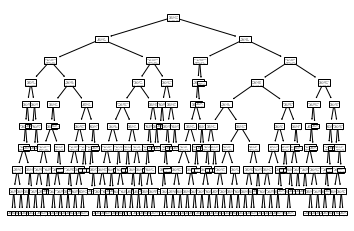

In [ ]:
#Plotting the  Tree
tree.plot_tree(dt)

In [ ]:
#predicting target for test data set provided by kaggle

test = dt.predict(testData)
print(test)




[0 0 0 ... 0 0 0]


In [ ]:
# printing the ID to a submissions file

submission = testData[["ID"]]
print (submission)


           ID
0           2
1           5
2           6
3           7
4           9
...       ...
75813  151831
75814  151832
75815  151833
75816  151834
75817  151837

[75818 rows x 1 columns]


In [ ]:
# Printing. the target to a submissions file and writing the submissions to a csv file called results _test
submission["TARGET"]= test
print(submission)
submission.to_csv("/gdrive/My Drive/results_test.csv", index = None)

           ID  TARGET
0           2       0
1           5       0
2           6       0
3           7       0
4           9       0
...       ...     ...
75813  151831       0
75814  151832       0
75815  151833       0
75816  151834       0
75817  151837       0

[75818 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Write into a file with actual prediction and corresponding probability
pred = pd.DataFrame(dt.predict(X_train),columns=['Prediction'])
pd.concat([pred,pred_Probability],axis=1).to_csv("/gdrive/My Drive/results.csv", index = None)

res=pd.read_csv('/gdrive/My Drive/results.csv')
res.head()

In [ ]:
# Now we will pre process the data



# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:

    dt = DecisionTreeClassifier(max_depth = depth,
                             random_state = 0)
    dt.fit(X_train, Y_train)
    score = dt.score(X_test, Y_test)
    accuracy.append(score)
    print(score)

# looking at the accuracy for all depth levels, we see that 4 will be a resonable good depth level

0.9603393843725335
0.9603393843725335
0.9602736122073139
0.9603393843725335
0.9601420678768745
0.9596158905551171
0.959221257563799
0.9585635359116023
0.9581031307550645


In [ ]:
dt1 = DecisionTreeClassifier(criterion='entropy', splitter='best',
                             max_depth=4, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             random_state=10,min_impurity_decrease=0.0)





In [ ]:
dt1.fit(X_train, Y_train)

#Predict the responce on new Test Dataset
Y_PredNew1 = dt1.predict(X_test)
Y_new1 = dt1.predict(X_train)

#Model Accuracy
print("Training Accuracy:", metrics.accuracy_score(Y_train, Y_new1))
print("Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew1))


Training Accuracy: 0.960454485661668
Accuracy: 0.9603393843725335


[Text(0.5, 0.9, 'X[183] <= 2.445\nentropy = 0.24\nsamples = 60816\nvalue = [58411, 2405]'),
 Text(0.25, 0.7, 'X[2] <= 27.5\nentropy = 0.433\nsamples = 17008\nvalue = [15496, 1512]'),
 Text(0.125, 0.5, 'X[369] <= 57022.035\nentropy = 0.167\nsamples = 8899\nvalue = [8680, 219]'),
 Text(0.0625, 0.3, 'X[2] <= 23.5\nentropy = 0.321\nsamples = 1146\nvalue = [1079, 67]'),
 Text(0.03125, 0.1, 'entropy = 0.237\nsamples = 748\nvalue = [719, 29]'),
 Text(0.09375, 0.1, 'entropy = 0.454\nsamples = 398\nvalue = [360, 38]'),
 Text(0.1875, 0.3, 'X[2] <= 24.5\nentropy = 0.139\nsamples = 7753\nvalue = [7601, 152]'),
 Text(0.15625, 0.1, 'entropy = 0.111\nsamples = 5717\nvalue = [5633, 84]'),
 Text(0.21875, 0.1, 'entropy = 0.211\nsamples = 2036\nvalue = [1968, 68]'),
 Text(0.375, 0.5, 'X[369] <= 117563.086\nentropy = 0.633\nsamples = 8109\nvalue = [6816, 1293]'),
 Text(0.3125, 0.3, 'X[330] <= 3.495\nentropy = 0.688\nsamples = 6165\nvalue = [5032, 1133]'),
 Text(0.28125, 0.1, 'entropy = 0.705\nsamples = 57

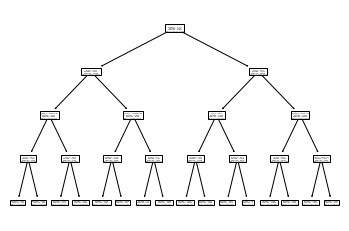

In [ ]:
#Plotting the  Tree
tree.plot_tree(dt1)

In [ ]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation for dt1
print(metrics.confusion_matrix(Y_test, Y_PredNew1))
print()
print('Printing the precision and recall, among other metrics')

print(metrics.classification_report(Y_test, Y_PredNew1))


[[14601     0]
 [  603     0]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14601
           1       0.00      0.00      0.00       603

    accuracy                           0.96     15204
   macro avg       0.48      0.50      0.49     15204
weighted avg       0.92      0.96      0.94     15204



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# testing on the test data file to get a prediction
test1 = dt1.predict(testData)
print(test1)

# printing the ID to a submissions file

submission2 = testData[["ID"]]
print (submission2)

# Printing. the target to a submissions file and writing the submissions to a csv file called results _dt2
submission2["TARGET"]= test1
print(submission2)
submission2.to_csv("/gdrive/My Drive/results_dt1.csv", index = None)

[0 0 0 ... 0 0 0]
           ID
0           2
1           5
2           6
3           7
4           9
...       ...
75813  151831
75814  151832
75815  151833
75816  151834
75817  151837

[75818 rows x 1 columns]
           ID  TARGET
0           2       0
1           5       0
2           6       0
3           7       0
4           9       0
...       ...     ...
75813  151831       0
75814  151832       0
75815  151833       0
75816  151834       0
75817  151837       0

[75818 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
